# Prioritization of Hypotheses and Analysis of an A/B Test

Together with the marketing department we've compiled a list of hypotheses that may help boost revenue. We will prioritize these hypotheses, launch an A/B test, and analyze the results. <br> At the end of the analysis we will decide whether to continue the test or to stop the test. If we stop the test, we will have a leader group or we won't see differences between the groups.

# Table of Contents

- 1) [Prioritization of Hypotheses](#1)
<br> <br>
    - 1.1) [Open the data and study the general information](#1.1)
    - 1.2) [ICE method](#1.2)
    - 1.3) [RICE method](#1.3)
    - 1.4) [Differences in Prioritization between both methods](#1.4)
    <br> <br>
- 2) [A/B Test Analysis](#2)
<br> <br>
    - 2.1) [Prepare the data](#2.1)
    - 2.2) [Cumulative revenue by group](#2.2)
    - 2.3) [Cumulative average order size by group](#2.3)
    - 2.4) [Relative difference in cumulative average order size](#2.4)
    - 2.5) [Conversion rate by group](#2.5)
    - 2.6) [Number of orders per user](#2.6)
    - 2.7) [Order prices](#2.7)
    - 2.8) [Statistical significance: Difference in conversion rate (unfiltered data)](#2.8)
    - 2.9) [Statistical significance: Difference in average order size (unfiltered data)](#2.9)
    - 2.10) [Statistical significance: Difference in conversion rate (filtered data)](#2.10)
    - 2.11) [Statistical significance: Difference in average order size (filtered data)](#2.11)
    - 2.12) [Decision for A/B Test](#2.12)

<a id="1"></a>

## 1) Prioritization of Hypotheses

We will prioritize the hypotheses using the ICE method and the RICE method and will analyse the differences in prioritization these method lead to. At first we will properly prepare the table containing the hypotheses and their corresponding values needed for the methods. <br> The goal of this part of the project is to present how the prioritization changes when using the RICE method instead of the ICE method and we will give an explanation for the changes.

<a id="1.1"></a>

### 1.1) Open the data and study the general information

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

# read the full hypotheses
pd.set_option("display.max_colwidth", -1)

In [2]:
# read hypotheses data file
try:
    hypo_data = pd.read_csv('C:/Users/Herbert/Documents/Practicum100/datasets/A,B_Test/hypotheses_us.csv', sep = ';')
except:
    print("Couldn't read 'hypotheses' csv file.")

In [3]:
hypo_data

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [4]:
hypo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


#### Conclusion

The table 'hypo_data' consists of all informations needed for prioritization with the ICE and the RICE method; the columns are 'Hypothesis', 'Reach', 'Impact', 'Confidence' and 'Effort' and there are 9 rows resp. hypotheses. The values of the parameters are given in a range of numbers between 1 and 10.

<a id="1.2"></a>

### 1.2) ICE method

In [5]:
# calculate ICE values for every hypothesis
hypo_data['ICE Score'] = hypo_data['Impact'] * hypo_data['Confidence'] / hypo_data['Effort']
# add hypotheses numbers
hypo_data['Hypothesis Number'] = [1, 2, 3, 4, 5, 6, 7, 8, 9]
# sort table in descending order
hypo_ice = hypo_data[['Hypothesis', 'Hypothesis Number', 'ICE Score']].sort_values(by = 'ICE Score', ascending = False)

hypo_ice

,Hypothesis,Hypothesis Number,ICE Score
8,Launch a promotion that gives users discounts on their birthdays,9,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,1,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,8,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,7,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,3,7.000000
1,Launch your own delivery service. This will shorten delivery time,2,2.000000
5,Add a customer review page. This will increase the number of orders,6,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,4,1.125000
4,Change the background color on the main page. This will increase user engagement,5,1.000000


#### Conclusion

The ICE scores show a range between 1 for hypothesis 1 and 16.2 for hypothesis 8. Looking at the scores, we can divide them into 3 groups: <br> <br>
Group 1: <br>
Hypothesis Numbers: 1, 8, 9. ICE scores: Between 11.2 and 16.2: <br>
For these hypotheses the impact parameter ranges between 7 and 10, the confidence parameter between 8 and 9 and the effort parameter between 5 and 6. We can see that the scores of the parameters don't vary much, so according to the ICE method these hypotheses are similarly prioritized. <br> <br>
Group 2: <br>
Numbers: 3, 7. ICE scores: 7 (for hyp. 3) and 8 (for hyp. 7): <br>
The impact and the effort parameter are 3 for both hypotheses and the confidence parameters are 7 (for hyp. 3) and 8 (for hyp. 7). According to the ICE method, these hypotheses are prioritized very similar. <br> <br>
Group 3: <br>
Numbers: 2, 4, 5, 6. ICE scores: Between 1 and 2: <br>
For this group the ICE scores have small differences, but there are differences in the parameters: The impact parameter ranges between 1 and 5, the confidence parameter between 1 and 4 and the efforts parameter between 1 and 10. 

<a id="1.3"></a>

### 1.3) RICE method

In [6]:
# calculate RICE values
hypo_data['RICE Score'] = hypo_data['Reach'] * hypo_data['Impact'] \
        * hypo_data['Confidence'] / hypo_data['Effort']
# show ranking of RICE values in descending order
hypo_rice = hypo_data[['Hypothesis', 'Hypothesis Number', 'RICE Score']].sort_values(by = 'RICE Score', ascending = False)

hypo_rice

,Hypothesis,Hypothesis Number,RICE Score
7,Add a subscription form to all the main pages. This will help you compile a mailing list,8,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,3,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,1,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,7,40.0
8,Launch a promotion that gives users discounts on their birthdays,9,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,4,9.0
1,Launch your own delivery service. This will shorten delivery time,2,4.0
5,Add a customer review page. This will increase the number of orders,6,4.0
4,Change the background color on the main page. This will increase user engagement,5,3.0


#### Conclusion

There are two big jumps in the sorted RICE score table: <br>
The clearly leading hypothesis is number 8 with a score of 112. The second biggest score is half as big with 56 points for hypothesis 3. The next big jump are between hypotheses 7 and 9 where 6 has 40 points and 8 has 16.2 points. The last four places have less than 10 points and consists of the hypotheses 2, 4, 5 and 6.

<a id="1.4"></a>

### 1.4) Differences in Prioritization between both methods

In [7]:
# show all the data and sort by RICE values in descending order
hypo_data.sort_values(by='RICE Score', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE Score,Hypothesis Number,RICE Score
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,8,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,3,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,1,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,7,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,9,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,4,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,2,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,6,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,5,3.0


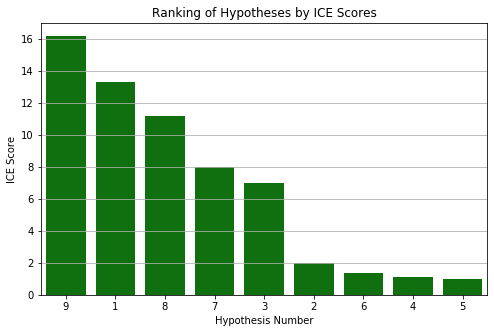

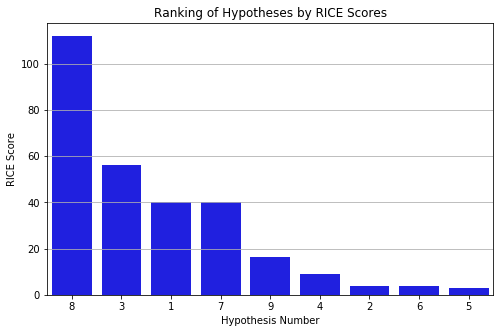

In [8]:
# plots for the ICE and RICE scores

plt.figure(figsize=(8,5))
plt.grid()
plt.title('Ranking of Hypotheses by ICE Scores')
sns.barplot(data=hypo_data, x="Hypothesis Number", y="ICE Score", color='green', \
            order=hypo_data.sort_values('ICE Score', ascending=False)['Hypothesis Number'])
plt.show()

plt.figure(figsize=(8,5))
plt.grid()
plt.title('Ranking of Hypotheses by RICE Scores')
sns.barplot(data=hypo_data, x="Hypothesis Number", y="RICE Score", color='blue', \
            order=hypo_data.sort_values('RICE Score', ascending=False)['Hypothesis Number'])
plt.show()

The bar plots above visualise the rankings of the hypotheses by ICE resp. RICE scores. For both bar plots one can see that there are big differences for the different scores, so each method of scoring delivers an order for prioritizing hypotheses. The most prioritized hypothesis is different by the score methods.

In [9]:
# Here we can see the differences in ranking between both methods

print("Places:")
print("[1, 2, 3, 4, 5, 6, 7, 8, 9]")
print("ICE method - hypotheses ranking:")
print(list(hypo_ice['Hypothesis Number']))
print("RICE method - hypotheses ranking:")
print(list(hypo_rice['Hypothesis Number']))

Places:
[1, 2, 3, 4, 5, 6, 7, 8, 9]
ICE method - hypotheses ranking:
[9, 1, 8, 7, 3, 2, 6, 4, 5]
RICE method - hypotheses ranking:
[8, 3, 1, 7, 9, 4, 2, 6, 5]


#### Conclusion

Looking at the lists under the table one can see the impact of including the reach parameter in prioritizing: The four last places (places 6 to 9) contain the same hypotheses for both methods: 1, 3, 4, 5. The biggest change in prioritizing is given for hypothesis 8  which has the highest ICE value but is in place 5 in the RICE ranking - both have the value 16.2, so the reach value of 1 changed the prioritization of hypothesis 8 significantly. Hypothesis 7 has the third highest ICE value of 11.2 and the clearly highest RICE value of 112 due to the reach value of 10. For the hypotheses 0, 2 and 6, the prioritization also changed including the reach parameter; but they remained within the places 2 and 5. <br> <br> The differences are given mathematically: Switching from the ICE to the RICE method we use one more factor in the calculation - the reach parameter. This factor can leave the ICE value the same (if reach = 1) or make it even 10 times bigger (if reach = 10). That's the reason why adding the reach factor has such an impact in prioritization. Hypothesis 8 is a good example since it changed from the first to the fifth place; its reach parameter is 1. This hypothesis refers to the customer's birthday and when paying attention to only one customer that has his birthday today it seems to be an excellent idea to make a promotion on that day. But including the reach parameter, one can think of the fact that the probability for a certain customer to have his birthday today is 1 to 365 - very low.

<a id="2"></a>

## 2) A/B Test Analysis

In the second part of the project we analyse the given results from an A/B Test; they are given by two tables: The table 'visits' shows the number of visits on dates specified in the group A or B and the table 'orders' shows data for every order that has been recorded for the A/B Test. <br>
Goal: At the end of the analysis we will decide whether to continue the test or to stop the test. If we stop the test, we will have a leader group or we won't see differences between the groups.

<a id="2.1"></a>

### 2.1) Prepare the data

#### Table 'visits'

In [10]:
# read visits csv data file
try:
    visits = pd.read_csv('C:/Users/Herbert/Documents/Practicum100/datasets/A,B_Test/visits_us.csv')
except:
    print("Couldn't read 'visits' csv file.")

In [11]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


The 'visits' table consists of 62 rows and 3 columns and has no missing values. The date and group columns are in object data type and the visits are in integer data type.

In [13]:
# transform dates in datetime data type
visits['date'] = pd.to_datetime(visits['date'], format='%Y-%m-%d')

In [14]:
# check changed data type
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [15]:
print("Value counts of groups:")
print(visits['group'].value_counts())

Value counts of groups:
B    31
A    31
Name: group, dtype: int64


In [16]:
print("Number of visits:")
print("Minimum:", visits['visits'].min())
print("Maximum:", visits['visits'].max())

Number of visits:
Minimum: 361
Maximum: 770


In [17]:
print("Value counts of dates:")
print(visits['date'].value_counts().sort_index())

Value counts of dates:
2019-08-01    2
2019-08-02    2
2019-08-03    2
2019-08-04    2
2019-08-05    2
2019-08-06    2
2019-08-07    2
2019-08-08    2
2019-08-09    2
2019-08-10    2
2019-08-11    2
2019-08-12    2
2019-08-13    2
2019-08-14    2
2019-08-15    2
2019-08-16    2
2019-08-17    2
2019-08-18    2
2019-08-19    2
2019-08-20    2
2019-08-21    2
2019-08-22    2
2019-08-23    2
2019-08-24    2
2019-08-25    2
2019-08-26    2
2019-08-27    2
2019-08-28    2
2019-08-29    2
2019-08-30    2
2019-08-31    2
Name: date, dtype: int64


One can see that half of the rows belong to group A and half of the rows belong to group B as expected. Every single day between the first and the 31th of august 2019 has 2 rows. The number of visits vary between 361 and 770 visits.

In [18]:
# Let's check if there's any duplicate within the dates and the groups:
visits[['date', 'group']].duplicated().sum()

0

So we verified that every single date has exactly one visits value for group A and one for group B.

##### Conclusion

For the visits of the online store we have a table showing the number of visits for every day between 2019-08-01 and 2019-08-31 for both groups A and B. That's why this table has 62 rows containing the date, group and number of visits. For the visits we have values between 361 and 770. We transformed the dates into datetime data type and have the visits given in integer data type and the groups given in objects data type. There are no missing values.

#### Table 'orders'

In [19]:
# read orders csv data file
try:
    orders = pd.read_csv('C:/Users/Herbert/Documents/Practicum100/datasets/A,B_Test/orders_us.csv')
except:
    print("Couldn't read 'orders' csv file.")

In [20]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [21]:
# For easier handling we rename the first two columns of the orders table
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null object
revenue           1197 non-null float64
group             1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [23]:
# transform dates into datetime data type
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [24]:
# check changed data type
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null datetime64[ns]
revenue           1197 non-null float64
group             1197 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


The table 'orders' has 1197 rows and the transaction ID and the visitor ID are given in integer data types. The dates have been transformed into datetime data type. The revenues are given in float data type and the group in object data type. There are no missing values.

In [25]:
print("Number of unique transaction IDs:", orders['transaction_id'].nunique())
print("Number of unique visitor IDs:", orders['visitor_id'].nunique())

Number of unique transaction IDs: 1197
Number of unique visitor IDs: 1031


Since the table has 1197 rows every row has a different transaction ID. The number of unique visitor IDs is 1031, so there's a difference of 166 from the number of rows; there are some customers with multiple orders within the one observed month.

In [26]:
print("Earliest date in table 'orders':", orders['date'].min())
print("Latest date in table 'orders':", orders['date'].max())

Earliest date in table 'orders': 2019-08-01 00:00:00
Latest date in table 'orders': 2019-08-31 00:00:00


All given dates in the orders table correspond to the observed month august 2019.

In [27]:
print("Value counts of groups:")
print(orders['group'].value_counts())

Value counts of groups:
B    640
A    557
Name: group, dtype: int64


We definitely have only the expected groups A and B in the table 'orders' and have 557 orders for group A and 640 orders for group B - so the number of orders for every group doesn't differ too much.

In [28]:
number_of_purchases = orders.groupby(['date', 'group']).agg({'revenue': 'count'})
number_of_purchases.columns = ['number of purchases']
print(number_of_purchases.head())
print()
print("Maximum number of purchases on one day for one group:", \
      number_of_purchases['number of purchases'].max())

                  number of purchases
date       group                     
2019-08-01 A      24                 
           B      21                 
2019-08-02 A      20                 
           B      24                 
2019-08-03 A      24                 

Maximum number of purchases on one day for one group: 31


Since we have no more than 31 purchases per day per group, we can exclude that there's a day with more purchases than visits.

In [29]:
# create a table grouping the number of orders for every visitor ID and for every group
# if for a certain combination of visitor ID and group there's no order, this combination is not listed in the new table
visitors_both_groups = orders.groupby(['visitor_id', 'group']).agg({'revenue': 'count'}).reset_index()

# if a visitor ID is listed twice, then it has purchases for both groups, so let's add a helping column showing
# if the visitor ID is duplicated
visitors_both_groups['id_is_duplicated'] = visitors_both_groups['visitor_id'].duplicated()

visitors_both_groups.head()

,visitor_id,group,revenue,id_is_duplicated
0,5114589,B,1,False
1,6958315,B,1,False
2,8300375,A,1,False
3,8300375,B,1,True
4,11685486,A,1,False


In [30]:
# create an empty list
list_visitors_both_groups = []

# add all visitor IDs to this list that have purchases in both groups:
# If the visitor ID is duplicated in the grouped table 'visitors_both_groups' then the ID will be added to the list:

for i in range(len(visitors_both_groups)):
    if visitors_both_groups.loc[i, 'id_is_duplicated'] == True:
        list_visitors_both_groups.append(visitors_both_groups.loc[i, 'visitor_id'])

# number of users that are in both groups
len(list_visitors_both_groups)

58

In [31]:
# save the table with all the data before cleaning it
orders_old = orders

# delete all purchases from the orders table that have visitor IDs for both groups:
for i in range(len(orders)):
    if orders.loc[i, 'visitor_id'] in list_visitors_both_groups:
        orders = orders.drop([i])
        
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1016 non-null int64
visitor_id        1016 non-null int64
date              1016 non-null datetime64[ns]
revenue           1016 non-null float64
group             1016 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 87.6+ KB


In [32]:
print("Values after cleaning the table 'orders':")
print()
print("Minimum revenue value:", orders['revenue'].min(), "dollars")
print("Maximum revenue value:", orders['revenue'].max(), "dollars")
print("Minimum number of purchases on one day for one group:", \
      orders.groupby(['date', 'group']).agg({'revenue': 'count'})['revenue'].min())
print("Maximum number of purchases on one day for one group:", \
      orders.groupby(['date', 'group']).agg({'revenue': 'count'})['revenue'].max())
print("Earliest date in table 'orders':", orders['date'].min())
print("Latest date in table 'orders':", orders['date'].max())
print()
print("Number of unique users in each group:")
print("Group A: {:.0f} users".format(orders[orders['group'] == 'A']['visitor_id'].nunique()))
print("Group B: {:.0f} users".format(orders[orders['group'] == 'B']['visitor_id'].nunique()))
print()
print("Number of orders for every group:")
print(orders['group'].value_counts())

Values after cleaning the table 'orders':

Minimum revenue value: 5.0 dollars
Maximum revenue value: 19920.4 dollars
Minimum number of purchases on one day for one group: 6
Maximum number of purchases on one day for one group: 26
Earliest date in table 'orders': 2019-08-01 00:00:00
Latest date in table 'orders': 2019-08-31 00:00:00

Number of unique users in each group:
Group A: 445 users
Group B: 528 users

Number of orders for every group:
B    548
A    468
Name: group, dtype: int64


##### Conclusion

Our table 'orders' shows the purchases from the online store in august 2019 of users being part of the A/B-Test. It has 5 rows: The transaction ID is different for every single purchase and is in integer data type. The visitor ID is also in integer data type and after deleting 181 purchases with users being in both groups A and B, we have 1016 orders (and rows) in our table. The dates are given in datetime data type and range between the first and the 31th of august 2019. The revenues are given in float data type and range between 5 dollars and 19920.40 dollars. We have a column named 'group' showing whether the order is made from an user being in group A or B; this column is in object data type and overall we don't have any missing values. The maximum number of purchases on one day for one group is 26 so there are no days with more purchases than visits. The smallest number is given with 6 orders for one group on one day. From 1016 orders there are 468 orders referring to group A consisting of 445 users and 548 orders referring to group B consisting of 528 users.

<a id="2.2"></a>

### 2.2) Cumulative revenue by group

In [33]:
# building an array with unique paired date-group values
dates_groups = orders[['date','group']].drop_duplicates()

# getting aggregated cumulative daily data on orders 
orders_aggregated = dates_groups \
                .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])] \
                .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, \
                      'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1) \
                .sort_values(by=['date','group'])

# getting aggregated cumulative daily data on visitors  
visitors_aggregated = dates_groups \
                .apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])] \
                .agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1) \
                .sort_values(by=['date','group'])

# merging the two tables into one
cumul_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumul_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 6 columns):
date              62 non-null datetime64[ns]
group             62 non-null object
transaction_id    62 non-null int64
visitor_id        62 non-null int64
revenue           62 non-null float64
visits            62 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 3.4+ KB


In [34]:
# rename columns
cumul_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

cumul_data.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [35]:
# Create DataFrames with cumulative orders and cumulative revenue by day, group A resp. group B
cumul_revenue_A = cumul_data[cumul_data['group']=='A'][['date', 'revenue', 'orders']]
cumul_revenue_B = cumul_data[cumul_data['group']=='B'][['date', 'revenue', 'orders']]

# sort both tables by date
cumul_revenue_A = cumul_revenue_A.sort_values(by='date')
cumul_revenue_B = cumul_revenue_B.sort_values(by='date')

cumul_revenue_A.head()

,date,revenue,orders
0,2019-08-01,2266.6,23
2,2019-08-02,3734.9,42
4,2019-08-03,5550.1,66
6,2019-08-04,6225.6,77
8,2019-08-05,7623.6,99


In [36]:
cumul_revenue_B.head()

,date,revenue,orders
1,2019-08-01,967.2,17
3,2019-08-02,3535.3,40
5,2019-08-03,4606.9,54
7,2019-08-04,6138.5,68
9,2019-08-05,7587.8,89


In [37]:
print("Length of table 'cumul_revenue_A':", len(cumul_revenue_A))
print("Length of table 'cumul_revenue_B':", len(cumul_revenue_B))
print()
print("Both tables have the same length.")

Length of table 'cumul_revenue_A': 31
Length of table 'cumul_revenue_B': 31

Both tables have the same length.


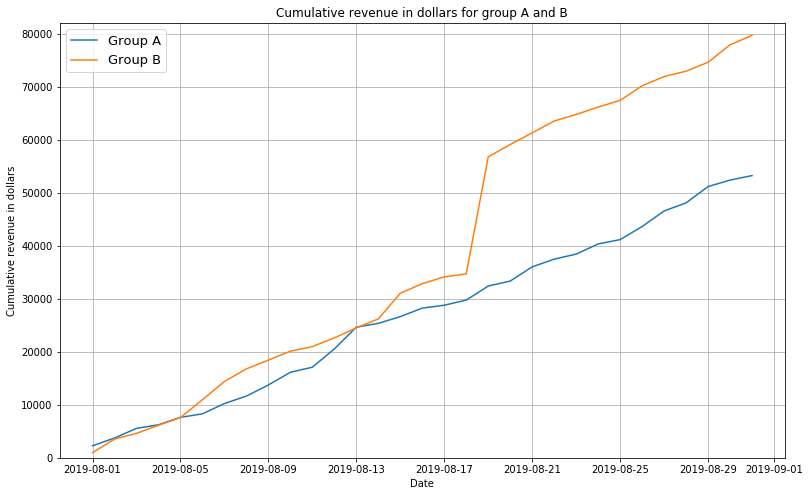

In [38]:
# Plot a diagramm showing the cumulative revenue by day for group A resp. group B

# data for both graphs
data_A = cumul_revenue_A['revenue']
data_B = cumul_revenue_B['revenue']

# x-axis as dates
xaxis_A = cumul_revenue_A['date']
xaxis_B = cumul_revenue_B['date']

plt.figure(figsize=(13, 8))
plt.plot(xaxis_A, data_A, label='Group A')
plt.plot(xaxis_B, data_B, label='Group B')
plt.ylim([0, 82000])
plt.xlabel("Date")
plt.ylabel("Cumulative revenue in dollars")
plt.title("Cumulative revenue in dollars for group A and B")
plt.grid()
plt.legend(prop={'size': 13})
plt.show()

The graph shows the cumulative revenue for both groups in the observed time period. One can observe that in the time period between the first and the 18th of august the cumulative revenue is very similar although the graph for group B is slightly above the graph for group A. From the 18th to the 19th of august the cumulative revenue fpr group B has a huge increase to more than 55000 dollars. After that jump, both graphs continue increasing with a similar gradient maintaining the distance caused by that described jump until the end of the observed time period. After one month, group A has slightly more than 52000 dollars of revenue and group B has nearly 80000 dollars of revenue.

In [39]:
# Take a closer look at the jump for group B between 17th and 20th of august

print("Cumulative revenue for group B between 17th and 20th of august:")
print()
print(cumul_revenue_B[(cumul_revenue_B['date'] >= '2019-08-17')&(cumul_revenue_B['date'] <= '2019-08-20')][['date', 'revenue']])

Cumulative revenue for group B between 17th and 20th of august:

         date  revenue
33 2019-08-17  34116.2
35 2019-08-18  34684.7
37 2019-08-19  56749.6
39 2019-08-20  59074.2


There's a big jump between the 18th and the 19th of august from around 35000 to 57000 dollars. There is a difference of around 22000 dollars. Let's see if there's a big order on that date:

In [40]:
# show most expensive orders on the 19th of august
orders[orders['date'] == '2019-08-19'].sort_values(by='revenue', ascending = False).head()

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
530,3970235543,2912540959,2019-08-19,680.8,A
527,1570513684,2837914161,2019-08-19,515.9,B
421,3765974140,1357170471,2019-08-19,490.4,A
461,2683113224,154576532,2019-08-19,410.5,B


In [41]:
# number of orders on that date for group B
len(orders[(orders['date'] == '2019-08-19')&(orders['group'] == 'B')])

21

Looking at the table, one can see that there is a big outlier for the revenues: One order for group B on 2019-08-19 has a value of 19920 dollars. The other 20 orders for that group on that day have values lower that 600 dollars. This one order is the reason for that unexpected jump in the graph for group B. 

In [42]:
print("Cumulative revenue on the 31th of august:")
print("Group A: {:.0f} dollars".format(cumul_revenue_A['revenue'].max()))
print("Group B: {:.0f} dollars".format(cumul_revenue_B['revenue'].max()))

Cumulative revenue on the 31th of august:
Group A: 53212 dollars
Group B: 79651 dollars


#### Conclusion

Looking at the graph for the cumulative revenue, one can see that besides that huge increase on the 19th of august for group B, the cumulative revenues for both groups have similar gradient while increasing. The main reason for the big jump is one order that has an extraordinary high revenue of 19920 dollars. The revenues for the other 20 orders on 2019-08-19 for group B have values lower than 600 dollars. In the end of the observed time period we have a cumulative revenue of 53212 dollars for group A and 79651 dollars for group B.

<a id="2.3"></a>

### 2.3) Cumulative average order size by group

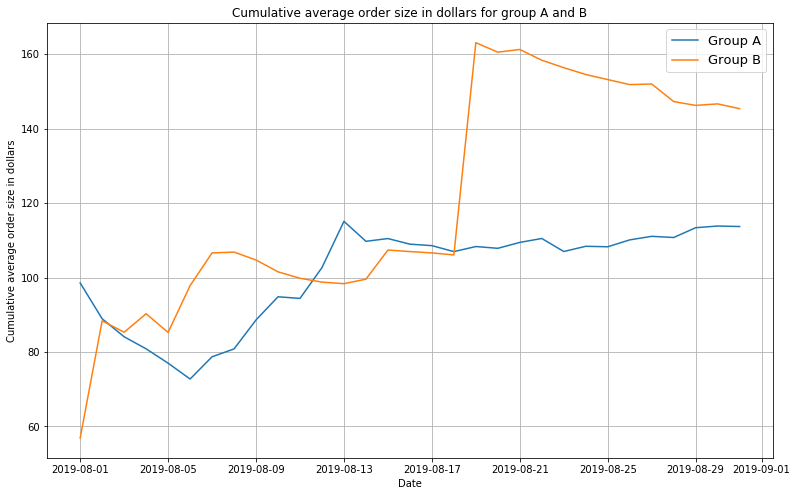

In [43]:
# Plot a diagramm showing the cumulative average order size by group

# data for both graphs
data_A = cumul_revenue_A['revenue']/cumul_revenue_A['orders']
data_B = cumul_revenue_B['revenue']/cumul_revenue_B['orders']

# x-axis as dates
xaxis_A = cumul_revenue_A['date']
xaxis_B = cumul_revenue_B['date']

plt.figure(figsize=(13, 8))
plt.plot(xaxis_A, data_A, label='Group A')
plt.plot(xaxis_B, data_B, label='Group B')
plt.xlabel("Date")
plt.ylabel("Cumulative average order size in dollars")
plt.title("Cumulative average order size in dollars for group A and B")
plt.grid()
plt.legend(prop={'size': 13})
plt.show()

#### Conclusion

In the first 15 days of the observed month we have big fluctuations for the cumulative average order size. In that time, the reasons for the fluctuations may be the less number of accumulated orders and the existence of further outliers in revenues. From the 15th until the 18th of august both curves have no flucuations. As expected, the big order on the 19th of august causes a huge increase of the cumulative average order size for group B since in the calculation, the value for the revenue increases about 19000 dollars but the number of orders only increases by 1. Beginning from the 19th of august, for both groups the intensity of the fluctuations is low. From that date on, one can observe an decreasing trend for group B until the end of the month. Since after that big jump the cumulative average order size is extraordinary high (160 dollars), from the decreasing trend for group B we can't make significant conclusions. For group A a trend can be observed from the 23th of august which is a slightly increasing trend. If there are also big outliers for revenues in that time period, it may be possible that the increasing trend of group A is more visible. As it is shown in the graph above, the increasing trend for group A is not solid enough to be settled.

<a id="2.4"></a>

### 2.4) Relative difference in cumulative average order size

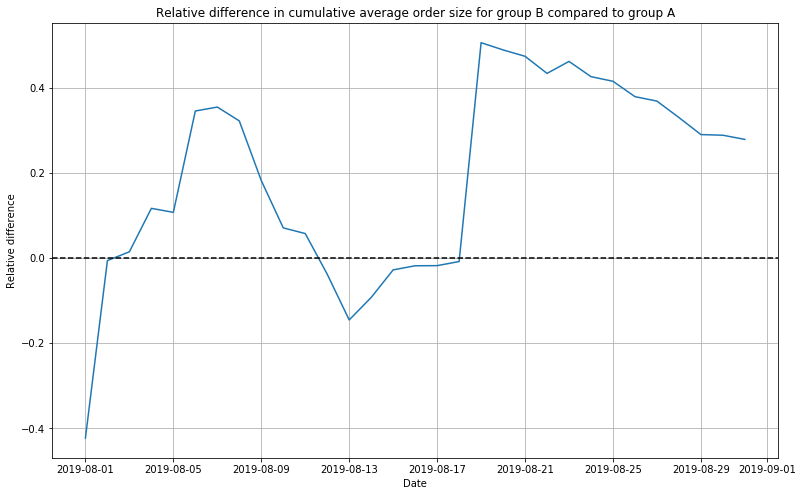

In [44]:
# Plot a diagramm showing the relative difference in cumulative average order size for group B compared to group A

# data for the graph
merged_cumul_revenue = cumul_revenue_A.merge(cumul_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# dates on the x-axis
xaxis = merged_cumul_revenue['date']

plt.figure(figsize=(13, 8))
plt.plot(xaxis, \
         (merged_cumul_revenue['revenueB']/merged_cumul_revenue['ordersB']) / \
         (merged_cumul_revenue['revenueA']/merged_cumul_revenue['ordersA']) - 1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel("Date")
plt.ylabel("Relative difference")
plt.title("Relative difference in cumulative average order size for group B compared to group A")
plt.grid()
plt.show()

#### Conclusion

As one can see in the graph above, at several points the difference between the segments spikes. Besides the one outlier at the 19th of august there are other outliers for order revenue; for example at the 13th or the 7th of august. Beginning from the 19th of august where the maximum relative difference of nearly 50% is reached, the relative difference shows a decreasing trend. Since the extraordinary expensive purchase in group B causes a big increase in this graph, the decreasing trend of the relative difference can't give us hints for its behaviour. Later in the analysis we will treat the anomalies.

<a id="2.5"></a>

### 2.5) Conversion rate by group

In [45]:
# for each date-group-pair count the number of orders
orders_count = orders.groupby(['date', 'group']).agg({'revenue': 'count'}).reset_index()

# rename columns
orders_count.columns = ['date', 'group', 'number_of_orders']

orders_count.head()

,date,group,number_of_orders
0,2019-08-01,A,23
1,2019-08-01,B,17
2,2019-08-02,A,19
3,2019-08-02,B,23
4,2019-08-03,A,24


In [46]:
# add the number of visits to the table for every day and group by merging it with the table 'visits'
df_conversion = orders_count.merge(visits, on=['date', 'group'])

# rename columns
df_conversion.columns = ['date', 'group', 'number_of_orders', 'number_of_visits']

# calculate conversion rate for every day in percent
df_conversion['conversion_rate'] = df_conversion['number_of_orders']/df_conversion['number_of_visits']*100

In [47]:
# create a table for each group
df_conversion_A = df_conversion[df_conversion['group'] == 'A']
df_conversion_B = df_conversion[df_conversion['group'] == 'B']

# sort values by date
df_conversion_A = df_conversion_A.sort_values(by='date')
df_conversion_B = df_conversion_B.sort_values(by='date')

In [48]:
# check if the tables have exactly 31 rows
df_conversion_A.info()
print()
df_conversion_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 60
Data columns (total 5 columns):
date                31 non-null datetime64[ns]
group               31 non-null object
number_of_orders    31 non-null int64
number_of_visits    31 non-null int64
conversion_rate     31 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.5+ KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1 to 61
Data columns (total 5 columns):
date                31 non-null datetime64[ns]
group               31 non-null object
number_of_orders    31 non-null int64
number_of_visits    31 non-null int64
conversion_rate     31 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.5+ KB


In [49]:
print(df_conversion_A.head())
print()
print(df_conversion_B.head())

        date group  number_of_orders  number_of_visits  conversion_rate
0 2019-08-01  A     23                719               3.198887       
2 2019-08-02  A     19                619               3.069467       
4 2019-08-03  A     24                507               4.733728       
6 2019-08-04  A     11                717               1.534170       
8 2019-08-05  A     22                756               2.910053       

        date group  number_of_orders  number_of_visits  conversion_rate
1 2019-08-01  B     17                713               2.384292       
3 2019-08-02  B     23                581               3.958692       
5 2019-08-03  B     14                509               2.750491       
7 2019-08-04  B     14                770               1.818182       
9 2019-08-05  B     21                707               2.970297       


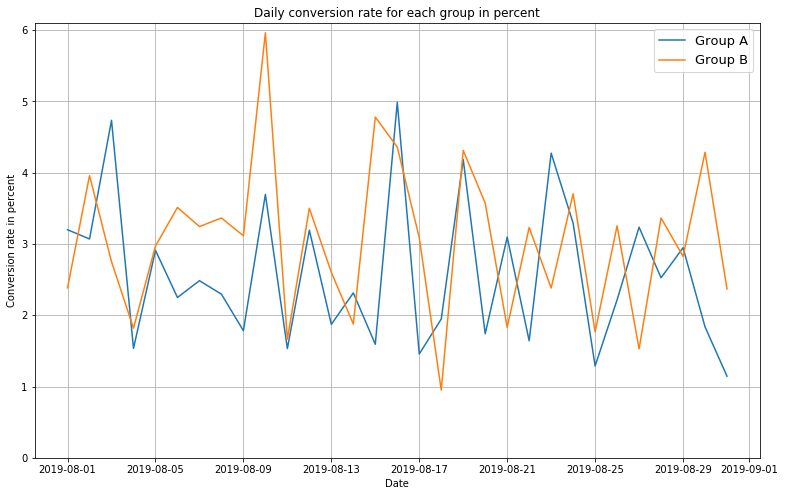

In [50]:
# plot the conversion rate for every day for each group

# data for both graphs
data_A = df_conversion_A['conversion_rate']
data_B = df_conversion_B['conversion_rate']

# dates as x-axis
xaxis_A = df_conversion_A['date']
xaxis_B = df_conversion_B['date']

plt.figure(figsize=(13, 8))
plt.plot(xaxis_A, data_A, label='Group A')
plt.plot(xaxis_B, data_B, label='Group B')
plt.ylim([0, 6.1])
plt.xlabel("Date")
plt.ylabel("Conversion rate in percent")
plt.title("Daily conversion rate for each group in percent")
plt.grid()
plt.legend(prop={'size': 13})
plt.show()

The conversion rate for every day has big fluctuations for both groups. The fluctuations are so big that one can't determine a certain trend. The conversion rates vary between 1 and 6 percent. In order to observe any trends, we need to plot the cumulative conversion rates.

In [51]:
# see the table 'cumul_data'
cumul_data.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


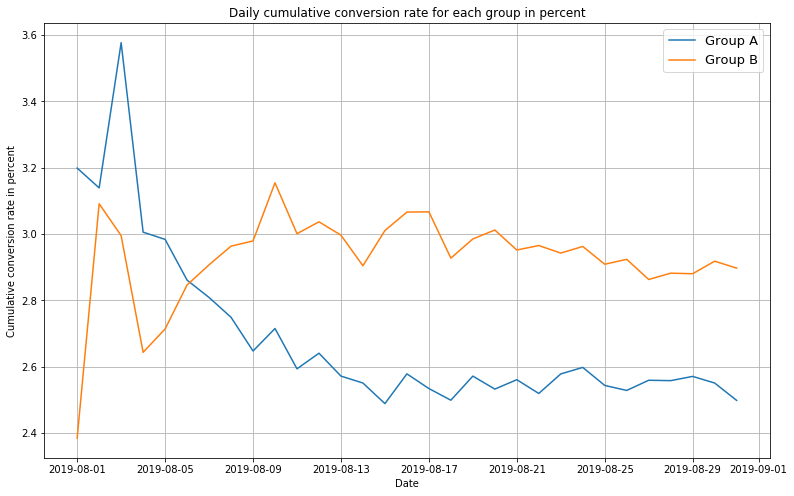

In [52]:
# calculate cumulative conversion in percent and plot it for each group
cumul_data['cumul_conversion_rate'] = cumul_data['orders'] / cumul_data['visits'] * 100

# selecting data on group A resp. group B
cumul_data_A = cumul_data[cumul_data['group']=='A']
cumul_data_B = cumul_data[cumul_data['group']=='B']

# dates as x-axis
xaxis_A = cumul_data_A['date']
xaxis_B = cumul_data_B['date']

plt.figure(figsize=(13, 8))
plt.plot(xaxis_A, cumul_data_A['cumul_conversion_rate'], label='Group A')
plt.plot(xaxis_B, cumul_data_B['cumul_conversion_rate'], label='Group B')
plt.xlabel("Date")
plt.ylabel("Cumulative conversion rate in percent")
plt.title("Daily cumulative conversion rate for each group in percent")
plt.grid()
plt.legend(prop={'size': 13})
plt.show()

#### Conclusion

When summing up the daily orders and visits, one can see a evolving trend for the conversion rate. In the beginning the conversion rate for group A was higher than for group B. One can see big fluctuations for the conversion rate in the beginning, for example the big increase from the 1st to the 2nd of august in group B shown by a change from 2.4% to 3.1%. Starting from the 7th august, the situation changes and group B has a higher conversion rate until the end of the observed time period. From that date on there's an evolving trend for both groups: Group A settles its conversion rate between 2.5% and 2.6% and group B settles its conversion rate around 2.9%. That means that within the month the difference between the cumulative conversion rates for group A and B becomes more constant. One can suppose that visitors in group B have a significantly higher conversion rate than in group A.

<a id="2.6"></a>

### 2.6) Number of orders per user

In [53]:
# create a table containing the number of orders for every user and its group
orders_per_user = orders.groupby(['visitor_id', 'group']).agg({'transaction_id':'count'}).reset_index()

# rename columns
orders_per_user.columns = ['visitor_id', 'group', 'number_of_orders']

orders_per_user.head()

,visitor_id,group,number_of_orders
0,5114589,B,1
1,6958315,B,1
2,11685486,A,1
3,39475350,B,1
4,47206413,B,1


In [54]:
print("Show the number of users having certain number of orders:")
print(orders_per_user['number_of_orders'].value_counts())
print()
print("Only for group A:")
print(orders_per_user[orders_per_user['group'] == 'A']['number_of_orders'].value_counts())
print()
print("Only for group B:")
print(orders_per_user[orders_per_user['group'] == 'B']['number_of_orders'].value_counts())

Show the number of users having certain number of orders:
1    937
2    29 
3    7  
Name: number_of_orders, dtype: int64

Only for group A:
1    427
2    13 
3    5  
Name: number_of_orders, dtype: int64

Only for group B:
1    510
2    16 
3    2  
Name: number_of_orders, dtype: int64


In [55]:
print("In average, an user made {:.2f} orders during august 2019.".format(orders_per_user['number_of_orders'].mean()))
print("In total there are {:.0f} customers who made at least one order in august 2019.".format(len(orders_per_user)))

In average, an user made 1.04 orders during august 2019.
In total there are 973 customers who made at least one order in august 2019.


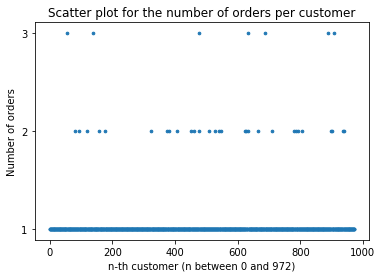

In [56]:
# scatter plot for the number of orders per user
x_values = pd.Series(range(0, len(orders_per_user['number_of_orders'])))

plt.scatter(x_values, orders_per_user['number_of_orders'], s=7)
plt.yticks([1, 2, 3])
plt.title("Scatter plot for the number of orders per customer")
plt.ylabel("Number of orders")
plt.xlabel("n-th customer (n between 0 and 972)")
plt.show()

In [57]:
print("The 95th and 99th percentile for the number of orders per user:")
print(np.percentile(orders_per_user['number_of_orders'], [95, 99]))

The 95th and 99th percentile for the number of orders per user:
[1. 2.]


#### Conclusion

In this task we create a scatter plot showing the number of purchases per user. This value can only take an integer between 1 and 3 as one can see in the scatter plot. We found out that the most part of the 973 customers made one order during august (937 user). This can't be seen well in the scatter plot since the dots are too big, so the number of users with multiple orders appears too huge in the plot. Only 7 users made 3 orders during august 2019. The average value is 1.04 orders per user. We can conclude that the most users who order something only do one order during one or more months. The number of orders per user for different groups show that the most part of those who made 3 orders are in group A (5 out of 7 user) although group A has less user than group B (Group A: 445 user in total, Group B: 528 user in total). <br> <br>
We also determined the 95th and the 99th percentile for the number of orders per user. The 95th percentile is 1 and the 99th percentile is 2. Therefore I define the point of anormaly by above 2 orders per user; that means 3 orders per user counts as an anomaly.

<a id="2.7"></a>

### 2.7) Order prices

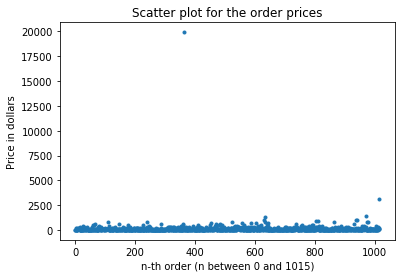

In [58]:
# scatter plot for the order prices

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], s=9)
plt.title("Scatter plot for the order prices")
plt.ylabel("Price in dollars")
plt.xlabel("n-th order (n between 0 and 1015)")
plt.show()

The scatter plot shows that the most order prices are below 2000 dollars. There are 2 huge outliers given by one order around 3000 dollars (one dot right) and by one order at nearly 20000 dollars (one dot at the top). In order to visualise better the other order prices, I will create a second scatter plot excluding these two orders.

In [59]:
# 3 most expensive orders
orders.sort_values(by='revenue', ascending=False)[['date', 'group', 'revenue']].head(3)

,date,group,revenue
425,2019-08-19,B,19920.4
1196,2019-08-15,B,3120.1
1136,2019-08-13,A,1425.8


In [60]:
# 3 orders with lowest revenue
orders.sort_values(by='revenue')[['date', 'group', 'revenue']].head(3)

,date,group,revenue
1003,2019-08-08,A,5.0
404,2019-08-28,B,5.1
602,2019-08-09,A,5.1


We can exclude the two most expensive orders by filtering all prices above or equal 1500 dollars.

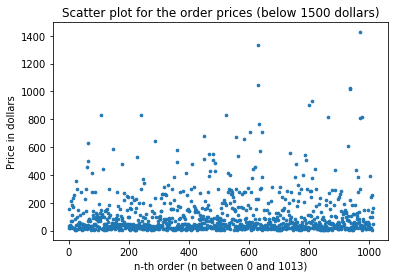

In [61]:
# filter orders that have more than or equal 1500 dollars as price
orders_below = orders[orders['revenue'] < 1500]

# scatter plot for the order prices; in the range between 0 and 1500 dollars

x_values = pd.Series(range(0, len(orders_below['revenue'])))
plt.scatter(x_values, orders_below['revenue'], s=7)
plt.title("Scatter plot for the order prices (below 1500 dollars)")
plt.ylabel("Price in dollars")
plt.xlabel("n-th order (n between 0 and 1013)")
plt.show()

In [62]:
print("The 95th and 99th percentile for order prices:")
print(np.percentile(orders['revenue'], [95, 99]))

The 95th and 99th percentile for order prices:
[414.275 830.3  ]


#### Conclusion

The scatter plot consisting of prices below 1500 dollars visualises that the more expensive an order the less common such an order happens. The plot inculdes 1014 order prices. There are many orders below 100 dollars, one can't even see the dots due to the amount of orders in that price segment. Between 100 and 200 dollars one can observe that increasing prices become rare very fast. Starting at 400 dollars, one can clearly see the dots seperately. In the scatter plot we can also see orders costing more than 1000 dollars but also orders for less than 10 dollars. That means the big online store offers from a various range of things with a wide range for prices. Even though one can find things for less than 10 dollars the most users only had one order in august. <br> <br> The 95th percentile for order prices is given by 414 dollars and the 99th percentile by 830 dollars. Therefore, since 400 dollars is the limit of seeing the dots seperately in the scatter plot and since the 95th percentile of 414 dollars is close to it, I define all order prices above 400 dollars as anormalies.

<a id="2.8"></a>

### 2.8) Statistical significance: Difference in conversion rate (unfiltered data)

In [63]:
# For each group, store the columns 'visitor_id' and 'orders'.
# For visitors with at least one order, we'll indicate the number of orders made

orders_by_users_A = orders[orders['group']=='A'].groupby('visitor_id', as_index=False) \
            .agg({'transaction_id' : pd.Series.nunique})

orders_by_users_B = orders[orders['group']=='B'].groupby('visitor_id', as_index=False) \
            .agg({'transaction_id' : pd.Series.nunique})

# rename columns

orders_by_users_A.columns = ['visitor_id', 'orders']
orders_by_users_B.columns = ['visitor_id', 'orders'] 

# We need to prepare for the Mann-Whitney-U-Test, so we create zeroes for visitors who didn't order anything.
# Their number is the difference between the total number of visitors and the number of records on orders.
# We concatenate these zeros with the list of the number of orders for each user

# (Based on the given data I can't consider multiple visits from one certain visitor, so I have to assume that every visit
# is from another visitor )

sample_A = pd.concat([orders_by_users_A['orders'], pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() \
            -len(orders_by_users_A['orders'])), name='orders')], axis=0)

sample_B = pd.concat([orders_by_users_B['orders'], pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() \
            - len(orders_by_users_A['orders'])), name='orders')], axis=0)

In [64]:
sample_A.value_counts()

0    18291
1    427  
2    13   
3    5    
Name: orders, dtype: int64

In [65]:
sample_B.value_counts()

0    18471
1    510  
2    16   
3    2    
Name: orders, dtype: int64

Obviously both samples don't show any normality in their distributions, we use the Mann-Whitney-U-Test:

In [66]:
print("Null hypothesis: There's not a statistically significant difference in conversion between the groups A and B.")
print("Alternative hypothesis: There's a statistically significant difference in conversion between the groups A and B.")
print()
print("Results from the Mann-Whitney-U-Test based on the unfiltered data:")
print()
print("p-value: {:.1%}".format(stats.mannwhitneyu(sample_A, sample_B)[1]))
print()
if stats.mannwhitneyu(sample_A, sample_B)[1] > 0.05:
    print("The p-value is higher than 5%, So we accept the null hypothesis that there's not a statistically")
    print("significant difference in conversion between the groups.")
else:
    print("The p-value is lower or equal 5%, so we reject the null hypothesis and adopt the alternative hypothesis which assumes a statistically significant difference")
    print("in conversion between the groups.")
print()
print("Relative conversion gain for group B: {0:.1%}".format(sample_B.mean()/sample_A.mean()-1)) 

Null hypothesis: There's not a statistically significant difference in conversion between the groups A and B.
Alternative hypothesis: There's a statistically significant difference in conversion between the groups A and B.

Results from the Mann-Whitney-U-Test based on the unfiltered data:

p-value: 0.7%

The p-value is lower or equal 5%, so we reject the null hypothesis and adopt the alternative hypothesis which assumes a statistically significant difference
in conversion between the groups.

Relative conversion gain for group B: 15.5%


#### Conclusion

We have visitors with 0, 1, 2 or 3 orders within august 2019. Since the samples don't show any normality, we use the Mann-Whitney-U-Test for determining wheter the difference in conversion is statistically significant. Our test resulted in rejecting the null hypothesis, so we can assume a statistically significance in conversion between the groups. The relative conversion gain for group B compared to group A is 15.5%. The graph "Daily cumulative conversion rate for each group in percent" in section 'Conversion rate by group' also suggested that result since the graph for group B settled above the one for group A.

<a id="2.9"></a>

### 2.9) Statistical significance: Difference in average order size (unfiltered data)

In [67]:
# At first we test if we can assume normality for our test

alpha = .05 # significance level

results = stats.shapiro(orders[orders['group']=='A']['revenue'])
p_value = results[1] # the second value in the array of results (with index 1) - the p-value

print("Shapiro normality test:")
print()
print("Null hypothesis: There's no normality in our sample.")
print("Alternative hypothesis: We can assume normality in our sample.")
print()
print('p-value: ', p_value)

if (p_value < alpha):
    print("Null hypothesis rejected: We can't assume normality in our sample.")
else:
    print("Failed to reject the null hypothesis: We can assume normality in our sample.") 

Shapiro normality test:

Null hypothesis: There's no normality in our sample.
Alternative hypothesis: We can assume normality in our sample.

p-value:  2.7709587438572045e-31
Null hypothesis rejected: We can't assume normality in our sample.


Based on that result we use the Mann-Whitney-U-Test:

In [68]:
print("Null hypothesis: There's not a statistically significant difference in average order size between the groups A and B.")
print("Alternative hypothesis: There's a statistically significant difference in average order size between the groups A and B.")
print()
print("Results from the Mann-Whitney-U-Test based on the unfiltered data:")
print()
print("p-value: {:.1%}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], \
                                                   orders[orders['group']=='B']['revenue'])[1]))
print()
if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], \
                      orders[orders['group']=='B']['revenue'])[1] > 0.05:
    print("The p-value is higher than 5%, So we accept the null hypothesis that there's not a statistically")
    print("significant difference in average order size between the groups.")
else:
    print("The p-value is lower or equal 5%, so we reject the null hypothesis and adopt the alternative hypothesis which assumes a statistically significant difference")
    print("in average order size between the groups.")
print()
print("Relative gain in average order size for group B: {0:.1%}".format(orders[orders['group']=='B']['revenue'].mean() \
                                                                      / orders[orders['group']=='A']['revenue'].mean() - 1)) 

Null hypothesis: There's not a statistically significant difference in average order size between the groups A and B.
Alternative hypothesis: There's a statistically significant difference in average order size between the groups A and B.

Results from the Mann-Whitney-U-Test based on the unfiltered data:

p-value: 43.1%

The p-value is higher than 5%, So we accept the null hypothesis that there's not a statistically
significant difference in average order size between the groups.

Relative gain in average order size for group B: 27.8%


#### Conclusion

The distribution for order costs is not normal as we have seen in the Shapiro test. Using the Mann-Whitney-U-Test we found out that we accept the null hypothesis; that means we couldn't find a statistically significant difference in average order size between the groups. The relative  gain in average order size for group B compared to group A was also very high with 27.8%. Since we already know about the huge outliers for revenue values, we will compare that result with the test made on the filtered data.

<a id="2.10"></a>

### 2.10) Statistical significance: Difference in conversion rate (filtered data)

In [69]:
# From the section where we used the unfiltered data we have the tables 'orders_by_users_A' and 'orders_by_users_B'.

# We create a list containing all visitor IDs from customers that made more than 2 orders - that was 
# the defined lower border for anormalies.
# We set a condition and concatenate both tables:
ids_multiple_orders = pd.concat([orders_by_users_A[orders_by_users_A['orders'] > 2]['visitor_id'], \
                                 orders_by_users_B[orders_by_users_B['orders'] > 2]['visitor_id']], axis = 0)

# We make a second list containing all visitor IDs from customers that made purchases costing more than 400 dollars.
ids_expensive_orders = orders[orders['revenue'] > 400]['visitor_id']

# Let's concatenate these two lists to have one list containing all visitor IDs we need to filter from the table 'orders'
ids_to_filter = pd.concat([ids_multiple_orders, ids_expensive_orders], axis = 0).drop_duplicates().sort_values()

print(ids_to_filter.head(5))
print()
print("The list containing the IDs we will filter contains {:.0f} unique IDs.".format(ids_to_filter.shape[0]))

568     113298937
1099    148427295
461     154576532
928     204675465
33      249864742
Name: visitor_id, dtype: int64

The list containing the IDs we will filter contains 63 unique IDs.


In [70]:
# We create again samples for the significance test, but with the filtered data (for each group).
# We use the list 'ids_to_filter' to filter the data.

sample_A_filtered = pd.concat([orders_by_users_A[np.logical_not(orders_by_users_A['visitor_id'].isin(ids_to_filter))]['orders']\
                              ,pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() \
                                                           - len(orders_by_users_A['orders'])), name='orders')], axis=0)

sample_B_filtered = pd.concat([orders_by_users_B[np.logical_not(orders_by_users_B['visitor_id'].isin(ids_to_filter))]['orders']\
                              ,pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() \
                                                           - len(orders_by_users_B['orders'])), name='orders')], axis=0)

In [71]:
print("Null hypothesis: There's not a statistically significant difference in conversion between the groups A and B.")
print("Alternative hypothesis: There's a statistically significant difference in conversion between the groups A and B.")
print()
print("Results from the Mann-Whitney-U-Test based on the filtered data:")
print()
print("p-value: {:.1%}".format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))
print()
if stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1] > 0.05:
    print("The p-value is higher than 5%, So we accept the null hypothesis that there's not a statistically")
    print("significant difference in conversion between the groups.")
else:
    print("The p-value is lower or equal 5%, so we reject the null hypothesis and adopt the alternative hypothesis which assumes a statistically significant difference")
    print("in conversion between the groups.")
print()
print("Relative conversion gain for group B: {0:.1%}".format(sample_B_filtered.mean()/sample_A_filtered.mean()-1)) 

Null hypothesis: There's not a statistically significant difference in conversion between the groups A and B.
Alternative hypothesis: There's a statistically significant difference in conversion between the groups A and B.

Results from the Mann-Whitney-U-Test based on the filtered data:

p-value: 0.8%

The p-value is lower or equal 5%, so we reject the null hypothesis and adopt the alternative hypothesis which assumes a statistically significant difference
in conversion between the groups.

Relative conversion gain for group B: 17.6%


#### Conclusion

Now we can compare the results of the Mann-Whitney-U-Test with the filtered and the unfiltered data: <br> <br>
Unfiltered orders: Null hypothesis rejected, relative conversion gain for group B: 15.5% <br>
Filtered orders: Null hypothesis rejected, relative conversion gain for group B: 17.6% <br> <br>
As we calculated using the unfiltered data, we still have a statistical significance in the difference
in conversion between the groups using the filtered data. The filtered data has an impact to the relative conversion gain for group B since it increased slightly from 15.5% to 17.6%. That means the unfiltered data didn't have anormalies with a significant impact on conversion rates; the graph in section 'Conversion rate by group' already visualised the significance between both groups.

<a id="2.11"></a>

### 2.11) Statistical significance: Difference in average order size (filtered data)

In [72]:
# create filtered samples for average order size:

sample_A_avg_order_size_filtered = orders[np.logical_and(orders['group']=='A', \
                                          np.logical_not(orders['visitor_id'].isin(ids_to_filter)))]['revenue']

sample_B_avg_order_size_filtered = orders[np.logical_and(orders['group']=='B', \
                                          np.logical_not(orders['visitor_id'].isin(ids_to_filter)))]['revenue']

In [73]:
print("Null hypothesis: There's not a statistically significant difference in average order size between the groups A and B.")
print("Alternative hypothesis: There's a statistically significant difference in average order size between the groups A and B.")
print()
print("Results from the Mann-Whitney-U-Test based on the filtered data:")
print()
print("p-value: {:.1%}".format(stats.mannwhitneyu(sample_A_avg_order_size_filtered, sample_B_avg_order_size_filtered)[1]))
print()
if stats.mannwhitneyu(sample_A_avg_order_size_filtered, sample_B_avg_order_size_filtered)[1] > 0.05:
    print("The p-value is higher than 5%, So we accept the null hypothesis that there's not a statistically")
    print("significant difference in average order size between the groups.")
else:
    print("The p-value is lower or equal 5%, so we reject the null hypothesis and adopt the alternative hypothesis which assumes a statistically significant difference")
    print("in average order size between the groups.")
print()
print("Relative gain in average order size for group B: {0:.1%}".format(sample_B_avg_order_size_filtered.mean() \
                                                                      / sample_A_avg_order_size_filtered.mean() - 1)) 

Null hypothesis: There's not a statistically significant difference in average order size between the groups A and B.
Alternative hypothesis: There's a statistically significant difference in average order size between the groups A and B.

Results from the Mann-Whitney-U-Test based on the filtered data:

p-value: 28.7%

The p-value is higher than 5%, So we accept the null hypothesis that there's not a statistically
significant difference in average order size between the groups.

Relative gain in average order size for group B: -7.0%


#### Conclusion

See the differences in the Mann-Whitney-U-Test between the filtered and the unfiltered data: <br> <br>
Unfiltered orders: Null hypothesis accepted, relative gain in average order size for group B: 27.8% <br>
Filtered orders: Null hypothesis accepted, relative gain in average order size for group B: -7.0% <br> <br>
For both, the filtered and the unfiltered data, there's no statistical significance in the difference for average order size between the groups. It is no surprise that the relative gain in average order size for group B changed from 27.8% to -7.0% since there was the one huge order with a price of over 19000 dollars. This order significantly affected the graph we have in section 'Cumulative average order size by group'. After filtering the data, we now see that group B gives us a loss in average order size, but our test doesn't allow to set this loss as statistically significant.

<a id="2.12"></a>

### 2.12) Decision for A/B Test

Since we couldn't see a trend in the graph for average order size due to outliers in revenue, we create again a graph showing the relative difference in cumulative average order size using filtered data; the methods we use are analogue to these in section 'Relative difference in cumulative average order size'. Since the table 'visits' has summed up values for every day and every group, I can't substract the filtered visitor IDs from that table. Regarding the amount of visits the difference wouldn't be significant anyway.

In [74]:
# Filter the orders
orders_cleaned = orders[np.logical_not(orders['visitor_id'].isin(ids_to_filter))]

# building an array with unique paired date-group values
dates_groups_new = orders_cleaned[['date','group']].drop_duplicates()

# getting aggregated cumulative daily data on orders 
orders_aggregated_new = dates_groups_new \
                .apply(lambda x: orders_cleaned[np.logical_and(orders_cleaned['date'] <= x['date'], orders_cleaned['group'] == x['group'])] \
                .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, \
                      'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1) \
                .sort_values(by=['date','group'])

# getting aggregated cumulative daily data on visitors  
visitors_aggregated_new = dates_groups_new \
                .apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])] \
                .agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1) \
                .sort_values(by=['date','group'])

# merging the two tables into one
cumul_data_new = orders_aggregated_new.merge(visitors_aggregated_new, left_on=['date', 'group'], right_on=['date', 'group'])

cumul_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 6 columns):
date              62 non-null datetime64[ns]
group             62 non-null object
transaction_id    62 non-null int64
visitor_id        62 non-null int64
revenue           62 non-null float64
visits            62 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 3.4+ KB


In [75]:
# rename columns
cumul_data_new.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

cumul_data_new.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,16,15,883.2,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,34,32,2321.5,1338
3,2019-08-02,B,38,37,2469.7,1294
4,2019-08-03,A,58,56,4136.7,1845


In [76]:
# Create DataFrames with cumulative orders and cumulative revenue by day, group A resp. group B
cumul_revenue_A_new = cumul_data_new[cumul_data_new['group']=='A'][['date', 'revenue', 'orders']]
cumul_revenue_B_new = cumul_data_new[cumul_data_new['group']=='B'][['date', 'revenue', 'orders']]

# sort both tables by date
cumul_revenue_A_new = cumul_revenue_A_new.sort_values(by='date')
cumul_revenue_B_new = cumul_revenue_B_new.sort_values(by='date')

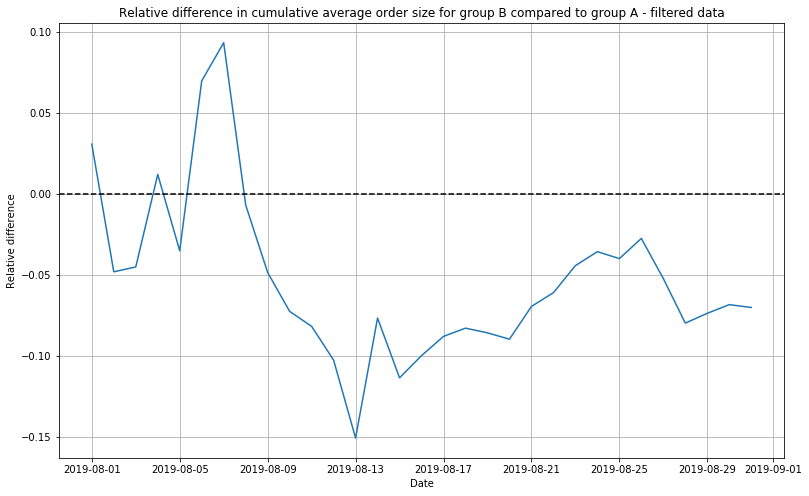

In [77]:
# Plot a diagramm showing the relative difference in cumulative average order size for group B compared to group A
# using filtered data

# data for the graph
merged_cumul_revenue_new = cumul_revenue_A_new.merge(cumul_revenue_B_new, left_on='date', \
                                                     right_on='date', how='left', suffixes=['A', 'B'])

# dates on the x-axis
xaxis = merged_cumul_revenue_new['date']

plt.figure(figsize=(13, 8))
plt.plot(xaxis, \
         (merged_cumul_revenue_new['revenueB']/merged_cumul_revenue_new['ordersB']) / \
         (merged_cumul_revenue_new['revenueA']/merged_cumul_revenue_new['ordersA']) - 1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel("Date")
plt.ylabel("Relative difference")
plt.title("Relative difference in cumulative average order size for group B compared to group A - filtered data")
plt.grid()
plt.show()

This graph with filtered data visualises that until the end of the month there a big fluctuations. At the end we have the estimated relative loss in average order size for group B given by -7.0%. This value isn't significant and this can't only be seen in the significance test but also in the graph. Starting from the 8th of august, the graph always is below the 0% line.

#### Conclusion

We found out that the relative gain for group B in conversion given by 17.6% is statistically significant; even considering unfiltered data the conversion gain of 15.5% for group B is statistically significant. We also found out that the relative loss for group B in average order size given by 7.0% is not statistically significant. In the graph above we can see that the relative gain for group B is negative with the filtered data since the 8th of august but has still big fluctuations. It is very likely that the relative gain for group B will have a negative result when continuing the test. This result will likely be between -15% and 0% since the graph shows negative values from 2019-08-08 and since the most negative value in that month is -15% on 2019-08-13. <br> <br>
We estimated a relative gain for group B of 17.6% resp. 15.5% for the conversion metric and estimated a relative loss for group B in average order size in the area of 0% and -15% which are still smaller absolute values than 15.5% resp. 17.6% from the conversion metric. These are the reasons why I decide to stop the test and consider group B as the leader group in the A/B Test.